# BBS 87/1

* [Verteilung der Funde](#Verteilung-der-Funde)
    * [Fundkategorien](#Fundkategorien)
    * [Keramische Stilgruppen](#Keramische-Stilgruppen)
    * [Fragmentierung der Keramik](#Fragmentierung-der-Keramik)
* [Formen](#Formen)
    * [Gefäßformen](#Gefäßformen)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
# pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Verteilung der Funde

### Fundkategorien

In [2]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'BBS')
           AND ((t_Obj.Komplex) = '87/1'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,Komplex,Individuum,Typ,Gewicht,Anzahl,Gr_Clist,Art,Tiefe
0,BBS,87/1,-1:3-4,MBA,27,1,70,K,10
1,BBS,87/1,-2:1,BBS,35,1,70,K,30
2,BBS,87/1,-2:4,None,34,1,70,K,30
3,BBS,87/1,2,BBS,17,1,70,K,0
4,BBS,87/1,5,BBS,45,1,70,Sonder,0


In [3]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Art', aggfunc = sum)
df_pivot

Art,HL,K,Schlacke,Sonder
Tiefe,,,,
0,39.0,85.0,NaN,45.0
10,NaN,157.0,NaN,NaN
30,56.0,472.0,49.0,NaN
40,3.0,54.0,NaN,NaN


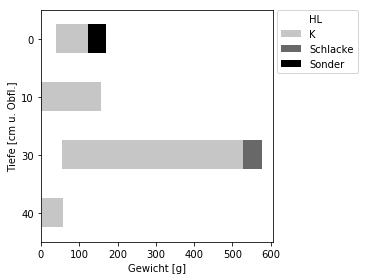

In [4]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Greys')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-6_BBS87-1_VerteilungFunde.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **BBS 87/1** Fundverteilung

In [5]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat.to_latex('../output/tabs/9-06_BBS87-1_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
0,gebrannter Lehm,6,8.0,0.10,10.2
1,Keramik,67,89.3,0.77,80.0
2,Schlacke,1,1.3,0.05,5.1
3,Sonder,1,1.3,0.04,4.7


## Keramische Stilgruppen

In [2]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'BBS')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,Komplex,Individuum,Typ,Gewicht,Gr_Clist,Art,Tiefe
0,BBS,87/1,-1:3-4,MBA,27,70,K,10
1,BBS,87/1,-2:1,BBS,35,70,K,30
2,BBS,87/1,-2:4,None,34,70,K,30
3,BBS,87/1,2,BBS,17,70,K,0
4,BBS,87/1,"-1:5-6,10,12-13",MBA,47,70,K,10


Leerstellen mit (?) ersetzen:

In [3]:
df['Typ'] = df['Typ'].replace('','(?)')
display(df.head())

,ort_kurz,Komplex,Individuum,Typ,Gewicht,Gr_Clist,Art,Tiefe
0,BBS,87/1,-1:3-4,MBA,27,70,K,10
1,BBS,87/1,-2:1,BBS,35,70,K,30
2,BBS,87/1,-2:4,None,34,70,K,30
3,BBS,87/1,2,BBS,17,70,K,0
4,BBS,87/1,"-1:5-6,10,12-13",MBA,47,70,K,10


In [4]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Typ', aggfunc = sum)
df_pivot

Typ,BBS,BBS (?),BBS/NGO (?),MBA,PKM (?)
Tiefe,,,,,
0,80.0,NaN,NaN,NaN,NaN
10,54.0,9.0,NaN,74.0,15.0
30,367.0,5.0,12.0,NaN,10.0
40,47.0,NaN,NaN,NaN,NaN


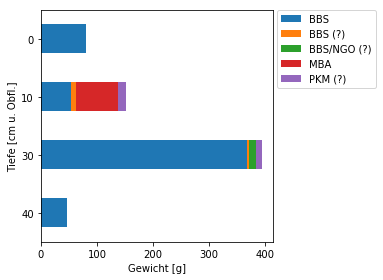

In [5]:
ax = df_pivot.plot(kind = 'barh', stacked=True)
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-6_BBS87-1_KeramikStilgruppen.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **BBS 87/1** keramische Stilgruppen

## Fragmentierung der Keramik

In [13]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Gr_Clist, 
           t_Obj.Art 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'BBS')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')
df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,Komplex,Individuum,Gr_Clist,Art
0,BBS,87/1,-1:3-4,70,K
1,BBS,87/1,-2:1,70,K
2,BBS,87/1,-2:4,70,K
3,BBS,87/1,2,70,K
4,BBS,87/1,"-1:5-6,10,12-13",70,K


In [14]:
df_pivot = df.pivot_table(values = 'ort_kurz', index = 'Gr_Clist', aggfunc = len)
df_pivot

Gr_Clist
30    16
70    30
Name: ort_kurz, dtype: int64

In [15]:
# da es in BBS 87/1 keine Keramik größer als 70 gab, müssen Dummy-Werte manuell eingefügt werden:
df_pivot[120] = 0.
df_pivot[200] = 0.
df_pivot['>200'] = 0.
df_pivot

Gr_Clist
30      16.0
70      30.0
120      0.0
200      0.0
>200     0.0
Name: ort_kurz, dtype: float64

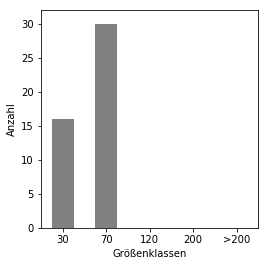

In [16]:
ax = df_pivot.plot(kind = 'bar', color = 'gray')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + 32))
plt.ylim([0,32]) 
plt.savefig('../output/figs/9-6_BBS87-1_Keramik_Fragmentierung.pdf', bbox_inches='tight')
plt.show()

> **BBS 87/1** Fragmentierungsgrad

## Formen

### Gefäßformen

In [17]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Form_Rand, 
           t_Obj.Art 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'BBS')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Form_Rand) <> ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,Komplex,Individuum,Typ,Form_Rand,Art
0,BBS,87/1,"-1:5-6,10,12-13",MBA,C2.2,K
1,BBS,87/1,-1:8,BBS (?),C3,K
2,BBS,87/1,-1:17,BBS,B2,K
3,BBS,87/1,-1:2,BBS,B2,K
4,BBS,87/1,-1:16,BBS,B1.1,K


In [18]:
df_pivot = df.pivot_table(values = 'ort_kurz', index = 'Form_Rand', aggfunc = len)
df_pivot

Form_Rand
B1      2
B1.1    4
B2      2
C2.2    1
C3      1
Name: ort_kurz, dtype: int64

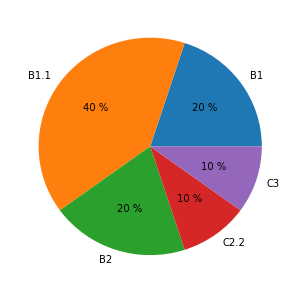

In [19]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%' )
plt.ylabel('')
plt.savefig('../output/figs/9-6_BBS87-1_KeramikRandformen.pdf')

> **BBS 87/1** Randformen

## Verzierungselemente

In [31]:
sql = """SELECT
            t_Ort.ort_kurz,
            t_Komplex.bef_nr,
            t_Obj.objID,
            t_Obj.Komplex,
            t_Obj.Individuum,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            INNER JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            INNER JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Ort.ort_kurz) = 'BBS')
            AND ((t_Komplex.bef_nr) = '87/1')
            AND ((t_Obj.Art) = "K")
            AND ((t_K_Pos.posID)<>1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [32]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len, fill_value = 0)
df_pivot

verzName,01.1,01.2,01.7,02.1,02.3,04.11,04.12,04.15,04.17,04.2,05.1,09.2
pos,,,,,,,,,,,,
1 Innen,0,0,0,1,0,1,0,0,0,0,0,0
2 Rand,1,1,0,2,0,0,1,0,0,0,0,0
3 Hals,0,0,0,5,0,0,0,0,1,1,0,0
4 Schulter,0,0,0,3,0,0,0,0,0,1,1,1
5 Bauch,0,4,1,7,1,0,0,1,0,0,0,0


In [33]:
df_pivot = df_pivot.sort_index(ascending=True)

In [34]:
# stellt die Grundeinstellung für Plots von Matplotlib wieder her – sieht bei Nutzung pysurvey besser aus
plt.rcdefaults()
%matplotlib inline

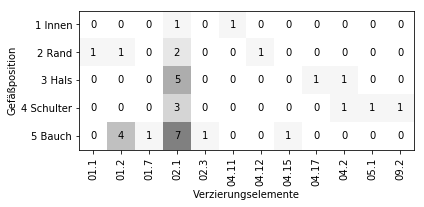

In [35]:
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/9-6_BBS87-1_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

> **BBS 87/1** Verzierungselemente

n

In [36]:
df['objID'].nunique()

20